## Project Programming for Data Analytics 2018

# Dataset Simulation

## Student ID G00219132
    
This notebook is a submission for Project 2018 for the Module **Programming for Data Analytics** The module is delivered as part of the [Higher Diploma in Data Analytics](https://www.gmit.ie/computing/higher-diploma-science-computing-data-analytics-ict-skills) in [Galway Mayo IT](https://www.gmit.ie/), Galway.

### problem statement outline
Below is an extract from the project instructions.

**Problem statement**

For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. 

Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.

Specifically, in this project you should:
* Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – thedata set itself can simply be displayed in an output cell within the notebook.

*Note students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set.*

### notebook structure
The notebook is split up into the following sections

* Section One - General setup and importatation of necessary python libraries/packages
* Section Two - Details of chosen phenomenon 
* Section Three - the types of variables involved, their likely distributions, and their relationships with each other.
* Section Four - Synthesise/simulate a data set as closely matching their properties as possible.
* Section Five - ????????????????????/
* Section Six - references and conclusion

### Section one - general set up
programming language - Python 3.7.0.for some information about Python and it's uses see the wikipedia page, [Python](https://en.wikipedia.org/wiki/Python_(programming_language))

python packages imported

* Mathplotlib.pyplot.py [Mathplotlib.org](https://matplotlib.org)
* NumPy [NumPy](http://www.numpy.org/)
* Seaborn [Seaborn](https://seaborn.pydata.org)
* Pandas [Pandas](https://pandas.pydata.org)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

### Section Two - Details of chosen phenomenon 

For this project I decided to build a dataset that would contain some synthesised student information, the information is based on some of the data gathered from Third Level Institutes by the Higher Education Authority [HEA](http://hea.ie/).
For some of the data variables I used statistics published by the HEA for the entry term 2016/17, [HEA Key Facts & figures 2016-17](http://hea.ie/assets/uploads/2018/02/HEA-Key-Facts-And-Figures-2016-17-FINAL.pdf) and for others I used observations from my own workplace which I will explain and reference. 

There are many variables and many student types/cohorts and I have used some artistic licence to decide what to include, whilst I am primarily mirroring a Y1 Undergraduate entrants cohort I have added a few non standard stats for that cohort (for example part time and distance learners are typically a stat of total enrollments rather than UG Y1). 


### Section Three - the types of variables involved, their likely distributions, and their relationships with each other.

Gender - this is a categorical variable and the gender breakdown in 2016/17 for UG new entrants was 51% Female
and 49% Male. In 2016/17 gender had two possible values, male or female. From 2018/19 onwards the available values have been changed.

Mode of Study - this is a categorical variable, I have taken some artistic licence here and am applying a breakdown that belongs to total enrollments to my UG cohort (as otherwise all would be full time)




In [5]:
import numpy as np

building a student dataset to look at variables that might influence progression as reported by HEA[1]

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt 

In [8]:
import pandas as pd

 ### Section Four - Synthesise/simulate a data set as closely matching their properties as possible.

In [9]:
CAO_ID =[]
for i in range(100):
        C = np.random.randint(16000000, 16100000)
        if C not in CAO_ID:CAO_ID.append(C)

print (CAO_ID)

##https://www.tutorialspoint.com/How-to-generate-non-repeating-random-numbers-in-Python

[16045556, 16021504, 16029485, 16053305, 16042009, 16080172, 16068772, 16058780, 16086657, 16045970, 16015299, 16070584, 16044187, 16088958, 16077767, 16065281, 16069189, 16075007, 16073629, 16005955, 16066119, 16062925, 16059435, 16020657, 16064615, 16012154, 16081822, 16039934, 16033508, 16093848, 16003127, 16088569, 16045292, 16064078, 16051720, 16033583, 16056730, 16075178, 16061140, 16050665, 16062864, 16004257, 16033242, 16023505, 16054924, 16006938, 16033580, 16078598, 16009524, 16055921, 16062654, 16080991, 16077798, 16033927, 16088176, 16066825, 16042327, 16087792, 16052314, 16031748, 16018076, 16009191, 16049104, 16018257, 16098324, 16056417, 16040224, 16021561, 16069673, 16001692, 16057991, 16049128, 16018846, 16024642, 16068324, 16026052, 16092728, 16031690, 16039009, 16015566, 16099425, 16041967, 16031503, 16070493, 16015838, 16039126, 16023804, 16002453, 16070048, 16059270, 16086681, 16095062, 16023948, 16048743, 16063838, 16099973, 16054366, 16008939, 16039138, 16070082]

In [10]:
M_F =np.random.choice (['male', 'female'], 100, p =[0.49,0.51])
M_F

array(['female', 'male', 'female', 'male', 'female', 'female', 'female',
       'female', 'male', 'female', 'male', 'male', 'male', 'male',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'male', 'male', 'female', 'male', 'female',
       'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'female', 'female', 'male', 'female', 'male', 'female', 'female',
       'female', 'female', 'male', 'female', 'male', 'female', 'male',
       'male', 'female', 'female', 'male', 'female', 'male', 'female',
       'male', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'female', 'female', 'male', 'female', 'male', 'female',
       'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'female',
       'male', 'female', 'male', 'male', 'male', 'female', 'female'],

In [11]:
Mode_of_Study = np.random.choice (['full time', 'part time','remote'], 100, p =[0.8,0.17,0.03])
Mode_of_Study

array(['full time', 'remote', 'full time', 'full time', 'full time',
       'part time', 'full time', 'remote', 'full time', 'full time',
       'full time', 'part time', 'full time', 'full time', 'part time',
       'full time', 'full time', 'full time', 'part time', 'full time',
       'part time', 'remote', 'full time', 'part time', 'part time',
       'full time', 'full time', 'full time', 'full time', 'full time',
       'part time', 'full time', 'part time', 'full time', 'full time',
       'full time', 'full time', 'full time', 'full time', 'full time',
       'full time', 'remote', 'full time', 'part time', 'full time',
       'full time', 'part time', 'full time', 'full time', 'full time',
       'part time', 'full time', 'full time', 'full time', 'full time',
       'full time', 'full time', 'full time', 'full time', 'full time',
       'full time', 'part time', 'full time', 'full time', 'full time',
       'full time', 'full time', 'full time', 'full time', 'full time',
    

In [12]:

pref =[]
for i in range (1,101):
   # pref = (print(int(13**np.random.random())))
    p = (int(10**np.random.random()))
    pref.append(p)
    ## assume preference follows benfords law
print (pref)
print(i)


[7, 2, 1, 2, 5, 2, 9, 4, 2, 3, 1, 1, 2, 1, 1, 4, 1, 4, 2, 1, 1, 4, 7, 1, 6, 2, 5, 2, 7, 3, 2, 1, 1, 1, 5, 9, 7, 6, 3, 1, 2, 5, 1, 1, 8, 4, 2, 1, 2, 1, 7, 2, 5, 2, 7, 2, 2, 1, 1, 9, 2, 6, 2, 2, 1, 4, 1, 1, 8, 2, 1, 1, 3, 2, 2, 7, 5, 2, 5, 2, 2, 3, 6, 4, 1, 4, 1, 3, 2, 5, 1, 5, 7, 8, 1, 6, 5, 5, 9, 3]
100


In [13]:
cao = np.random.randint(32, 70, size=100)
cao=cao*5
print(cao)
##CAO = pd.DataFrame(cao)
# cao pts in stps of 5 in range 160-350
##CAO

[330 260 280 300 230 210 270 345 170 210 310 225 175 245 245 185 200 255
 285 250 275 175 170 200 295 200 335 265 160 340 205 205 335 175 190 165
 245 200 230 295 195 170 340 240 270 200 240 255 230 325 175 310 235 230
 160 340 335 280 270 185 240 210 210 230 330 345 210 190 345 270 305 265
 240 270 310 335 195 275 180 245 170 290 305 305 240 250 225 255 170 305
 230 260 160 225 185 305 320 270 245 220]


In [14]:
# below creates an array of random dates based on published student age profile for New Entrants SEP 2016
# Students born before 1st Jan 1993 would be classed as Mature, others as described as Not Mature by HEA
# Data Field MAT will be created alongside DOB

DOB =[]
MAT =[]
def random_date(start_date, range_in_days):
    days_to_add = np.arange(0, range_in_days)
    random_date = np.datetime64(start_date) + np.random.choice(days_to_add)
    return random_date
i=1
for i in range(4):
    dob17 = random_date('1999-01-01', 635)
    DOB.append(dob17)
    MAT.append("NOT_MATURE")
for i in range(34):
    dob18 = random_date('1998-01-01', 200)
    DOB.append(dob18)
    MAT.append("NOT_MATURE")
for i in range(38): ##changed to 38 to allow for rounding in published %
    dob19 = random_date('1997-01-01', 200)
    DOB.append(dob19)
    MAT.append("NOT_MATURE")
for i in range(9):
    dob20 = random_date('1996-01-01', 200)
    DOB.append(dob20)
    MAT.append("NOT_MATURE")
for i in range(3):
    dob21 = random_date('1995-01-01', 200)
    DOB.append(dob21)
    MAT.append("NOT_MATURE")
for i in range(1):
    dob22 = random_date('1994-01-01', 200)
    DOB.append(dob22)
    MAT.append("NOT_MATURE")
for i in range(1):
    dob23 = random_date('1993-01-01', 200)
    DOB.append(dob23)
    MAT.append("MATURE")
for i in range(2):
    dob24 = random_date('1992-01-01', 200)
    DOB.append(dob24)
    MAT.append("MATURE")
for i in range(3):
    dob25_29 = random_date('1987-01-01', 1460)
    DOB.append(dob25_29)
    MAT.append("MATURE")
for i in range(5):
    dob30up = random_date('1941-01-01', 16425)
    DOB.append(dob30up)
    MAT.append ("MATURE")

         
        
##print (DOB)

#adapted from response to stackoverflow query[3]

In [15]:
Term =[]
for i in range(100):
    Term.append("2016/2017")
    print(Term)

['2016/2017']
['2016/2017', '2016/2017']
['2016/2017', '2016/2017', '2016/2017']
['2016/2017', '2016/2017', '2016/2017', '2016/2017']
['2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017']
['2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017']
['2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017']
['2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017']
['2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017']
['2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017']
['2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017']
['2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', '2016/2017', 

In [16]:
df = pd.DataFrame ()
df ["Term"]=Term
##df.insert(0, 'Term_code', '2016/2017', astype string)
df ["CAO_ID"] = CAO_ID
df ["Study_Mode"] = Mode_of_Study
df ["pref"] = pref
df ["CAO"] = cao
df ["Gender"] = M_F
df ["Date of Birth"]=DOB
df ["Mature student"]= MAT
df.head()
#df ["list"] = (int(13**np.random.random()))
df = df.sample(frac=1).reset_index(drop=True)  
##[stackoverflow](https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows)

In [17]:
df.head()

,Term,CAO_ID,Study_Mode,pref,CAO,Gender,Date of Birth,Mature student
0,2016/2017,16031690,full time,2,275,female,1996-02-24,NOT_MATURE
1,2016/2017,16077798,full time,5,235,male,1997-05-25,NOT_MATURE
2,2016/2017,16062654,part time,7,175,female,1997-03-01,NOT_MATURE
3,2016/2017,16051720,full time,5,190,male,1998-02-10,NOT_MATURE
4,2016/2017,16021561,full time,1,190,female,1997-05-17,NOT_MATURE


In [18]:
df.describe()
df.describe(include='all') 
import datetime
import sys
old_stdout = sys.stdout
sys.stdout = open('generalstats.txt', 'w')
print(df.describe())
print('\n'*2)
df.describe(include='all') 
print(df.describe(include='all'))
print ("Run date and time: " ,datetime.datetime.now().strftime("Date: %d-%m-%y    Time: %H-%M"))

sys.stdout = old_stdout
df.describe(include='all') 

# output to a csv adapted from code used for GMIT Programming & Scripting project 2018 [1] and
# trouble shooting assistance from a stackoverflow query responseto someone else's query[2]


,Term,CAO_ID,Study_Mode,pref,CAO,Gender,Date of Birth,Mature student
count,100,1.000000e+02,100,100.000000,100.000000,100,100,100
unique,1,NaN,3,NaN,NaN,2,91,2
top,2016/2017,NaN,full time,NaN,NaN,female,1997-03-06 00:00:00,NOT_MATURE
freq,100,NaN,82,NaN,NaN,51,2,89
first,NaN,NaN,NaN,NaN,NaN,NaN,1943-10-19 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2000-06-26 00:00:00,NaN
mean,NaN,1.605022e+07,NaN,3.340000,247.600000,NaN,NaN,NaN
std,NaN,2.646112e+04,NaN,2.400421,54.302185,NaN,NaN,NaN
min,NaN,1.600169e+07,NaN,1.000000,160.000000,NaN,NaN,NaN
25%,NaN,1.603100e+07,NaN,1.000000,200.000000,NaN,NaN,NaN


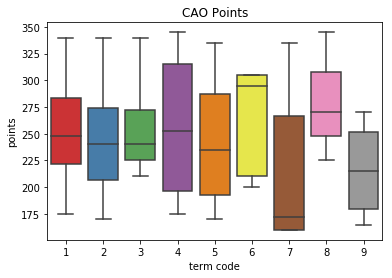

CAO                                                           \
           count unique top freq first last        mean        std    min   
Study_Mode                                                                  
full time   82.0    NaN NaN  NaN   NaN  NaN  248.536585  54.915692  160.0   
part time   14.0    NaN NaN  NaN   NaN  NaN  245.000000  45.191899  175.0   
remote       4.0    NaN NaN  NaN   NaN  NaN  237.500000  82.714368  170.0   

                   ...  pref                                                \
               25% ...  freq first last      mean       std  min  25%  50%   
Study_Mode         ...                                                       
full time   200.00 ...   NaN   NaN  NaN  3.451220  2.475322  1.0  1.0  2.0   
part time   210.00 ...   NaN   NaN  NaN  2.571429  2.138090  1.0  1.0  2.0   
remote      173.75 ...   NaN   NaN  NaN  3.750000  1.258306  2.0  3.5  4.0   

                       
             75%  max  
Study_Mode             
full time   5.00  9.0  
part time   2.75  7.0  
remote      4.25  5.0  

[3 rows x 91 columns]

In [30]:
##sns.pairplot(df)
sns.boxplot(x = 'pref', y = 'CAO', data = df, palette="Set1").set_title("CAO Points")
##plt.legend()
plt.ylabel('points')
plt.xlabel('term code') # title of the x axis
plt.show()
df.groupby("Study_Mode").describe(include='all') 


### Section Six - references and conclusion

[HEA](http://hea.ie/)

https://en.wikipedia.org/wiki/Benford%27s_law

https://cmdlinetips.com/2018/01/how-to-create-pandas-dataframe-from-multiple-lists/
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html ##describe 

[1] [programming & Scripting project 2018](https://github.com/Hudsonsue/GMIT-project-2018-programming-scripting)
[2][stackoverflow save to file](https://stackoverflow.com/questions/45200375/stdout-redirect-from-jupyter-notebook-is-landing-in-the-terminal)
[3][stackoverflow random dates](https://stackoverflow.com/questions/41006182/generate-random-dates-within-a-range-in-numpy)

### END